# Using GEBCO as a height map


Cutout created using ERA5 contain the geopotential height popular in metrology. This height measure is similar but not equivalent to height measures “above sea level” and is especially inaccurate in sea regions.

To use more a more precise height measure, atlite allows to create cutouts using the GEBCO datasets, which contains very precise height maps for sea as well as land areas.

.. note::
    It is strongly recommended to use the GEBCO height when accurate height's are required,
    e.g. when excluding offshore locations for wind turbines.


To utilise GEBCO for a cutout, the dataset first has to be manually downloaded from the GEBCO website in the “netCDF” and uncompressed manually. The GEBCO 2014 as well as GEBCO 2019 release are supported, with the later being a bit more accurate at a higher resolution, but subsequently significantly larger as the former. In the cutout creation the additional argument gebco_path then has to be pointed to the location to where the GEBCO_<year>.nc file was extracted to. The cutout is then finally prepared as usually, we additionaly trigger the spatial resolution to 0.1 degree.
    
    

In [1]:
import atlite

gebco = atlite.Cutout(
    path="gebco_height.nc",
    module="gebco",
    gebco_path="./GEBCO_2014_2D.nc",
    x=slice(-20, 40),
    y=slice(40, 70),
    dx=0.1,
    dy=0.1,
    chunks=None,
    time="2011-01",
)
gebco.prepare()

Disable urllib3 and cdsapi warnings.


<Cutout "gebco_height">
 x = -19.90 ⟷ 40.00, dx = 0.10
 y = 40.10 ⟷ 70.00, dy = 0.10
 time = 2011-01-01 ⟷ 2011-01-31, dt = H
 prepared_features = ['height']

In [2]:
gebco.data

<xarray.Dataset>
Dimensions:  (time: 744, x: 600, y: 300)
Coordinates:
    lon      (x) float64 ...
  * x        (x) float64 -19.9 -19.8 -19.7 -19.6 -19.5 ... 39.7 39.8 39.9 40.0
  * y        (y) float64 40.1 40.2 40.3 40.4 40.5 ... 69.6 69.7 69.8 69.9 70.0
    lat      (y) float64 ...
  * time     (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
Data variables:
    height   (y, x) float32 ...
Attributes:
    module:             gebco
    prepared_features:  height
    gebco_path:         /home/fabian/playground/atlite_modularized/GEBCO_2014...
    dx:                 0.1
    dy:                 0.1

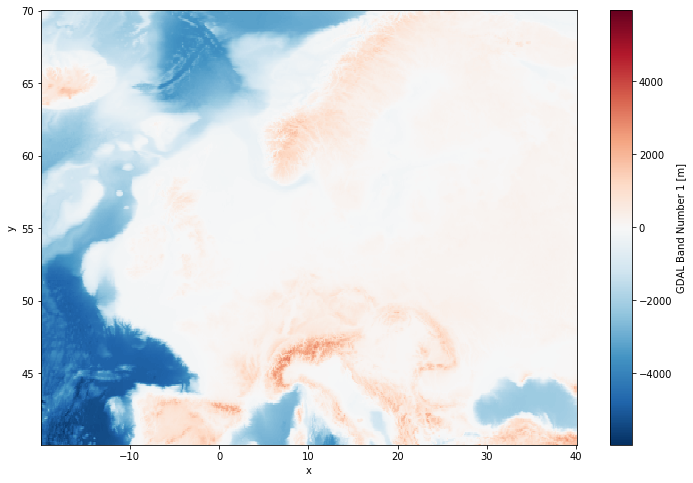

In [3]:
gebco.data.height.plot(size=8)

GEBCO uses a higher resolution as ERA5, thus the height map from GEBCO is rescaled using a weighted average to coincide with the ERA5 raster. The difference in heights between ERA5 and GEBCO for cutouts is shown below, underlining the difference when working on offshore locations:

In [4]:
era5_height = atlite.Cutout(
    path="era5_heigth.nc",
    module="era5",
    x=slice(-20, 40),
    y=slice(40, 70),
    time="2011-01",
    chunks=None,
)
era5_height.prepare(features=["height"])

<Cutout "era5_heigth">
 x = -20.00 ⟷ 40.00, dx = 0.25
 y = 40.00 ⟷ 70.00, dy = 0.25
 time = 2011-01-01 ⟷ 2011-01-01, dt = H
 prepared_features = ['height']

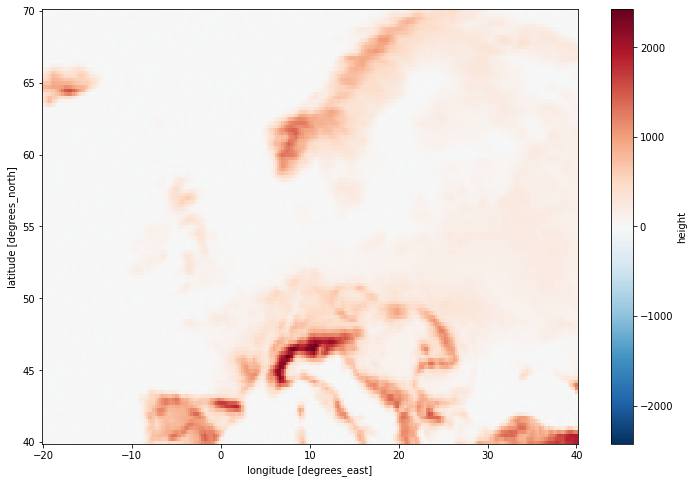

In [5]:
era5_height.data.height.plot(size=8)